# Lab 11: kNN

### Name: 

We will start by looking again at the MNIST handwritten digits dataset.

### Load the data

In [37]:
from sklearn import datasets

# load data set and extract the features (X) and target values (y)
digits = datasets.load_digits()
X = digits.data
y = digits.target

### Question 1

Use the *shape* attribute to find the number of rows and columns of *X*. Note that there are 1797 rows (images) and 64 columns (each image is 8x8).

In [38]:
X.shape

(1797, 64)

### Visualize the data

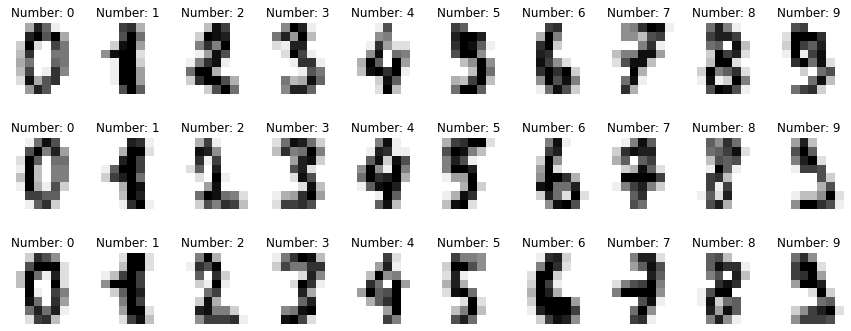

In [39]:
import matplotlib.pyplot as plt
# visualize the data by plotting the first 30 images
figure, axes = plt.subplots(3,10, figsize = (15,6))
for ax,image,number in zip(axes.ravel(), digits.images, y) :
    ax.axis('off')
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title('Number: ' + str(number))

### Question 2

Display the 200th image (and only this image), along with its target value.

### Split data into training and testing sets, fit the model, and make predictions in the *test* dataset

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Look at the *confusion matrix*

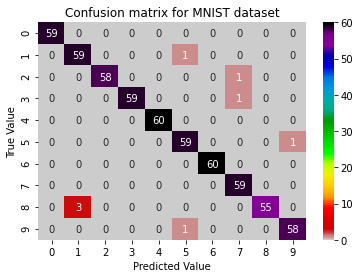

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Confusion matrix for MNIST dataset')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
None

### Question 3

Based on the confusion matrix above, what values are misclassified? What number is the digit '8' misclassified as?

### Question 4

Using the training and testing sets from above, generate the confusion matrix when using *kNN* with *k = 7*. Which value of *k* performs better, 3 or 7? Why?

## Breast Cancer Classification 

The code below loads the *Breast cancer wisconsin dataset* that contains data for 569 images. Each image is a breast mass that is either malignant (cancerous) or benign (normal). The features are measurements of the cell nuclei in each image, such as the radius of the nuclei (the interpretation of the features is not important, but feel free to ask questions if you are interested). This application has important medical implications -- the goal is to diagnose breast (and other) cancers more accurately and more quickly.

In [29]:
# load the data
bc = datasets.load_breast_cancer()

# extract the feature data into 'X'
X = bc.data

# extract the target data into 'y'
y = bc.target

### Question 5
Use python to display the number of samples and number of features for this dataset, as well as the names of the features.

### Question 6
Use the seaborn (*sns*) module to plot the mean radius on the x-axis and the mean smoothness on the y-axis, with the samples color coded by target value. Your plot should include appropriate x- and y-labels, as well as a title. This plot should demonstrate that these features can separate the '0' and '1' target values, which suggest that *kNN* is appropriate.

### Question 7

The code below generates training and testing data for the Breast Cancer dataset. Add code to make predictions in the testing dataset using *kNN* with *k = 3*. Then generate a confusion matrix and a heatmap (set the argument *fmt* to '.3g' in the *heatmap* method, to allow for 3 significant digits), and comment on the results.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)

### Question 8

Generate a classification report, using the target names, and answer the questions:

(a) If this classifier is used, what proportion of malignant tumors would be identified (this is the *recall* for malignant images)?

(b) If this classifier is used, what proportion of healthy individuals would be predicted to have cancer (this is the *false positive rate* and is equal to 1 - the *recall* for healthy images).